In [1]:
# The code was removed by Watson Studio for sharing.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
print('length of data is', len(df))

length of data is 3339


In [4]:
df.shape

(3339, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      3339 non-null   object 
 1   airline_sentiment             3339 non-null   object 
 2   airline_sentiment_confidence  3339 non-null   float64
 3   negativereason                2134 non-null   object 
 4   negativereason_confidence     2450 non-null   float64
 5   airline                       3338 non-null   object 
 6   name                          3338 non-null   object 
 7   retweet_count                 3338 non-null   float64
 8   text                          3338 non-null   object 
 9   tweet_created                 3243 non-null   object 
 10  tweet_location                2319 non-null   object 
 11  user_timezone                 2231 non-null   object 
dtypes: float64(3), object(9)
memory usage: 313.2+ KB


In [36]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

# Data visualization of target variable

In [14]:
df.groupby(['airline_sentiment']).size()

airline_sentiment
negative    2135
neutral      679
positive     525
dtype: int64

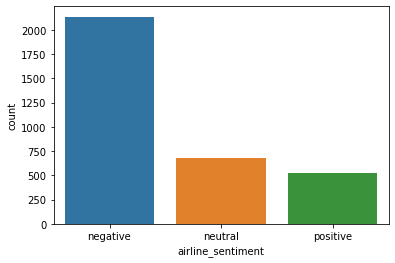

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='airline_sentiment',data=df,order=['negative','neutral','positive'])
plt.show()

# Data Preprocessing

In [25]:
tweets_df=df.drop(df[df['airline_sentiment_confidence']<0.5].index,axis=0)
tweets_df.shape

(3278, 12)

In [26]:
X=tweets_df['text']
y=tweets_df['airline_sentiment']

# Data cleaning 

In [65]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()


In [82]:
X=X.apply(str)

In [85]:
import re
cleaned_data=[]
for i in range(len(X)):
  tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
  
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
  
  tweet=' '.join(tweet)
  cleaned_data.append(tweet)

In [86]:
cleaned_data

['virginamerica dhepburn said',
 'virginamerica today must mean need take anoth trip',
 'virginamerica realli aggress blast obnoxi entertain guest face amp littl recours',
 'virginamerica realli big bad thing',
 'virginamerica serious would pay flight seat play realli bad thing fli va',
 'virginamerica ye nearli everi time fli vx ear worm go away',
 'virginamerica well',
 'virginamerica amaz arriv hour earli good',
 'virginamerica lt',
 'virginamerica great deal alreadi think nd trip australia amp',
 'virginamerica thank',
 'virginamerica sfo pdx schedul still mia',
 'virginamerica excit first cross countri flight lax mco heard noth great thing virgin america daystogo',
 'fli virginamerica',
 'virginamerica know would amazingli awesom bo fll pleas want fli',
 'virginamerica first fare may three time carrier seat avail select',
 'virginamerica love graphic http co ut grrwaaa',
 'virginamerica love hipster innov feel good brand',
 'virginamerica make bo gt',
 'virginamerica guy mess seat

In [42]:
y

0        neutral
2        neutral
3       negative
4       negative
5       negative
          ...   
3334    negative
3335    negative
3336    negative
3337    negative
3338    negative
Name: airline_sentiment, Length: 3278, dtype: object

In [43]:
sentiment_ordering = ['negative', 'neutral', 'positive']

y = y.apply(lambda x: sentiment_ordering.index(x))

In [44]:
y.head()

0    1
2    1
3    0
4    0
5    0
Name: airline_sentiment, dtype: int64

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=tv.fit_transform(cleaned_data).toarray()
X_fin.shape

(3278, 3000)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)

# Model Building and Evaluation

In [89]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [90]:
y_pred=model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.69      1.00      0.81       651
           1       0.85      0.09      0.16       192
           2       0.78      0.10      0.18       141

    accuracy                           0.69       984
   macro avg       0.77      0.40      0.38       984
weighted avg       0.73      0.69      0.60       984



In [88]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred1 = LRmodel.predict(X_test)
cf1=classification_report(y_test,y_pred1)
print(cf1)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       651
           1       0.54      0.34      0.42       192
           2       0.80      0.50      0.61       141

    accuracy                           0.76       984
   macro avg       0.71      0.59      0.63       984
weighted avg       0.74      0.76      0.74       984



# Conclusion

Upon evaluating all models,  
We can conclude that the Logistic Regression is the best model for the above-given dataset.<br>In our problem statement, Logistic Regression is following the principle of Occam’s Razor which defines that for a particular problem statement if the data has no assumption, then the simplest model works the best.<br> Since our dataset does not have any assumptions and Logistic Regression is a simple model, therefore the concept holds true for the above-mentioned dataset. 